<a href="https://colab.research.google.com/github/mleroseandrews/Making_the_NBA/blob/MachineLearning/ML_Model_First_Successful.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First we need to import our data and dependancies.**

In [12]:
#Create a folder, clone github to folder, checkout branch with data files.

!mkdir DaftDraft
%cd DaftDraft
!git clone https://github.com/mleroseandrews/Making_the_NBA.git
%cd Making_the_NBA/
!git checkout MachineLearning

/content/DaftDraft/Making_the_NBA/DaftDraft
Cloning into 'Making_the_NBA'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 205 (delta 54), reused 54 (delta 18), pack-reused 73
Receiving objects: 100% (205/205), 32.90 MiB | 7.27 MiB/s, done.
Resolving deltas: 100% (66/66), done.
/content/DaftDraft/Making_the_NBA/DaftDraft/Making_the_NBA
Branch 'MachineLearning' set up to track remote branch 'MachineLearning' from 'origin'.
Switched to a new branch 'MachineLearning'


In [13]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler, LabelEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import io


# Initial Read of data and removal of identifiers from training data.

In [14]:
# Path of file to read
data_path = 'CleanData/Players_Avg_Stats_09_21_clean.csv'
all_data = pd.read_csv(data_path, low_memory = False)
all_data

,pid,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,...,pts,Drafted,Round_Drafted,Number_of_Yrs_Played,Last_Yr_in_College_Date_Yr,player_name,Last_Yr_in_College_team,Last_Yr_in_College_conf,Last_Yr_in_College_School_Yr,Last_Yr_in_College_Position
0,2,26.0,29.500000,97.3,16.600000,42.500000,44.430000,1.6,4.6,15.8,...,3.884600,0.0,0.0,1,2009,DEANDRAE ROSS,South Alabama,SB,So,Unknown
1,3,33.0,63.133333,107.4,17.233333,51.166667,53.403333,2.3,6.2,14.8,...,7.796367,0.0,0.0,3,2011,POOH WILLIAMS,Utah St.,WAC,Sr,Combo G
2,5,27.0,72.000000,96.2,21.800000,45.700000,47.980000,2.1,8.0,14.7,...,12.185200,0.0,0.0,1,2009,JESUS VERDEJO,South Florida,BE,Sr,Unknown
3,8,30.0,44.500000,97.7,16.000000,53.600000,53.690000,4.1,9.4,13.7,...,4.933300,0.0,0.0,1,2009,MIKE HORNBUCKLE,Pepperdine,WCC,Sr,Unknown
4,9,33.0,56.200000,96.5,22.000000,52.800000,54.310000,8.3,18.6,8.2,...,7.575800,0.0,0.0,1,2009,ANTHONY BROWN,Pacific,BW,Sr,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22364,74196,8.0,3.700000,92.7,13.400000,40.000000,45.660000,7.4,21.4,17.4,...,0.625000,0.0,0.0,1,2021,ISAIAH FOLKES,Charlotte,CUSA,Fr,Wing G
22365,74203,16.0,12.900000,129.5,13.200000,67.900000,65.840000,8.5,8.5,2.4,...,2.812500,0.0,0.0,1,2021,FRANCK KEPNANG,Oregon,P12,Fr,C
22366,74213,10.0,5.900000,47.2,28.600000,11.900000,17.110000,0.0,24.9,13.8,...,1.727300,0.0,0.0,1,2021,GERALD DOAKES,New Mexico St.,WAC,Fr,Wing G
22367,74217,9.0,17.100000,86.9,21.800000,39.100000,40.090000,7.3,12.3,6.5,...,5.111100,0.0,0.0,1,2021,DAVID JONES,DePaul,BE,Fr,Wing F


In [15]:
# Drop the player name and player identifier.
all_data = all_data.drop(['player_name', 'pid'], axis=1)
all_data

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,blk,pts,Drafted,Round_Drafted,Number_of_Yrs_Played,Last_Yr_in_College_Date_Yr,Last_Yr_in_College_team,Last_Yr_in_College_conf,Last_Yr_in_College_School_Yr,Last_Yr_in_College_Position
0,26.0,29.500000,97.3,16.600000,42.500000,44.430000,1.6,4.6,15.8,16.300000,...,0.038500,3.884600,0.0,0.0,1,2009,South Alabama,SB,So,Unknown
1,33.0,63.133333,107.4,17.233333,51.166667,53.403333,2.3,6.2,14.8,16.866667,...,0.181667,7.796367,0.0,0.0,3,2011,Utah St.,WAC,Sr,Combo G
2,27.0,72.000000,96.2,21.800000,45.700000,47.980000,2.1,8.0,14.7,15.900000,...,0.000000,12.185200,0.0,0.0,1,2009,South Florida,BE,Sr,Unknown
3,30.0,44.500000,97.7,16.000000,53.600000,53.690000,4.1,9.4,13.7,23.800000,...,0.133300,4.933300,0.0,0.0,1,2009,Pepperdine,WCC,Sr,Unknown
4,33.0,56.200000,96.5,22.000000,52.800000,54.310000,8.3,18.6,8.2,22.700000,...,0.333300,7.575800,0.0,0.0,1,2009,Pacific,BW,Sr,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22364,8.0,3.700000,92.7,13.400000,40.000000,45.660000,7.4,21.4,17.4,25.800000,...,0.000000,0.625000,0.0,0.0,1,2021,Charlotte,CUSA,Fr,Wing G
22365,16.0,12.900000,129.5,13.200000,67.900000,65.840000,8.5,8.5,2.4,9.200000,...,1.125000,2.812500,0.0,0.0,1,2021,Oregon,P12,Fr,C
22366,10.0,5.900000,47.2,28.600000,11.900000,17.110000,0.0,24.9,13.8,10.700000,...,0.000000,1.727300,0.0,0.0,1,2021,New Mexico St.,WAC,Fr,Wing G
22367,9.0,17.100000,86.9,21.800000,39.100000,40.090000,7.3,12.3,6.5,11.800000,...,0.222200,5.111100,0.0,0.0,1,2021,DePaul,BE,Fr,Wing F


# (scrapped) Here we can modify to BIN certain groups if we need to.

## Why we scrapped binning the data.

The findings when we binned the data by reducing low occuring data points and grouping them together into an "other" category was that it introduced noise in the data.  Making it so that the data point became useless to the model.

# Seperate our training data from test data

We decided after visualizing the data that separating it based on conference would be beneficial.  There was much trial and error before coming to this conclusion where it became suspected that the data was just too prolific in undrafted players that the models could not predict the minority that represented drafted players.  With all the stats being so close together the model would just pick that no one would be drafted.  

To introduce parity between drafted and undrafted we take all drafted players and only take a subset of undrafted players based on conference.

If you play around with the model, you can see this by uncommenting the second train_data variable and running throught the testing. I can show it here in image form

What you see is that it very quickly converged to near 100% accuracy and near 0% loss in the first 5 epochs.  However it didn't start making good predictions on known data until around epoch 50 give or take.  Skipping to the end, we can see that it never got better at prediction on known values, nor did it ever make a good prediction on an unknown value.

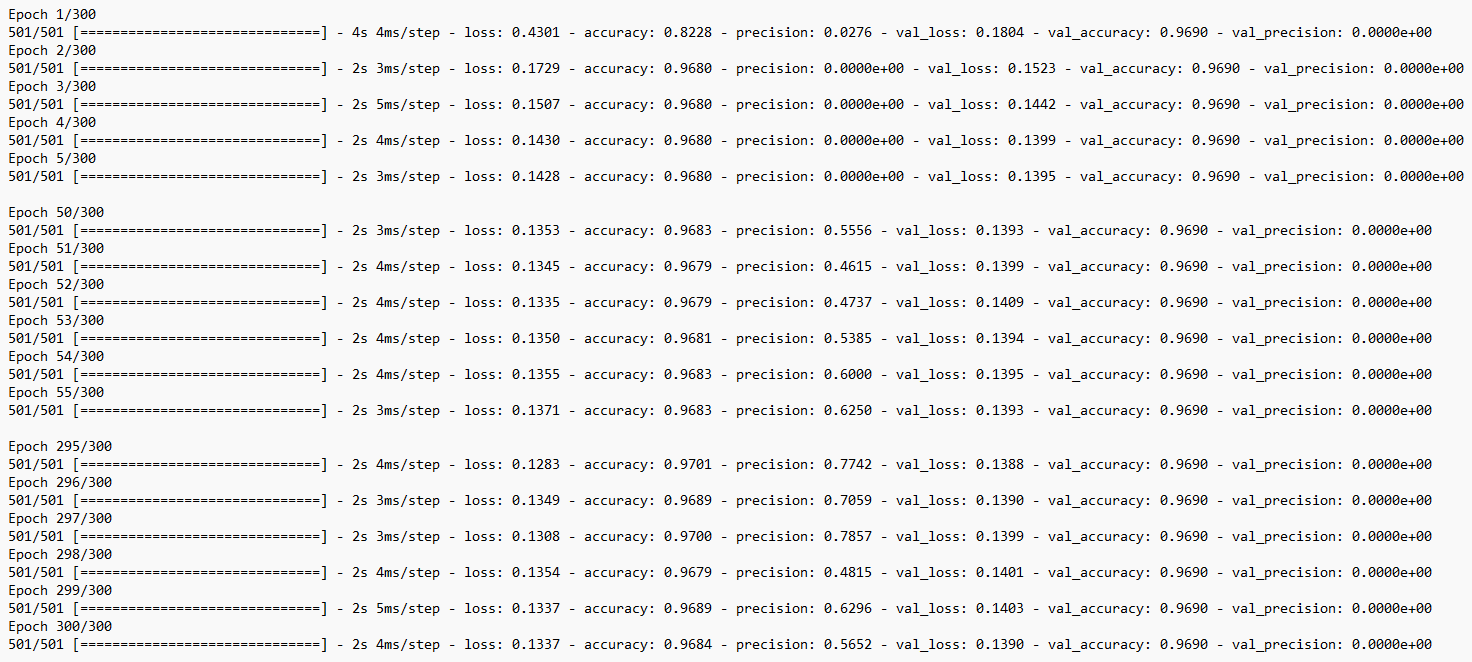


With the condensed training dataset We can see that in the first few epochs the proverbial thrown paint stuck but by the third epoch it couldn't make a good guess to save it's life. Right at epoch 39 we see that that it's starts making good guesses on known data, and skipping to the end, it has gotten fairly decent at making good predictions on unknown data.

In addition to allowing the model to function the reduced dataset also reduced the computation time per epoch somewhere between 2-3 orders of magnitude.


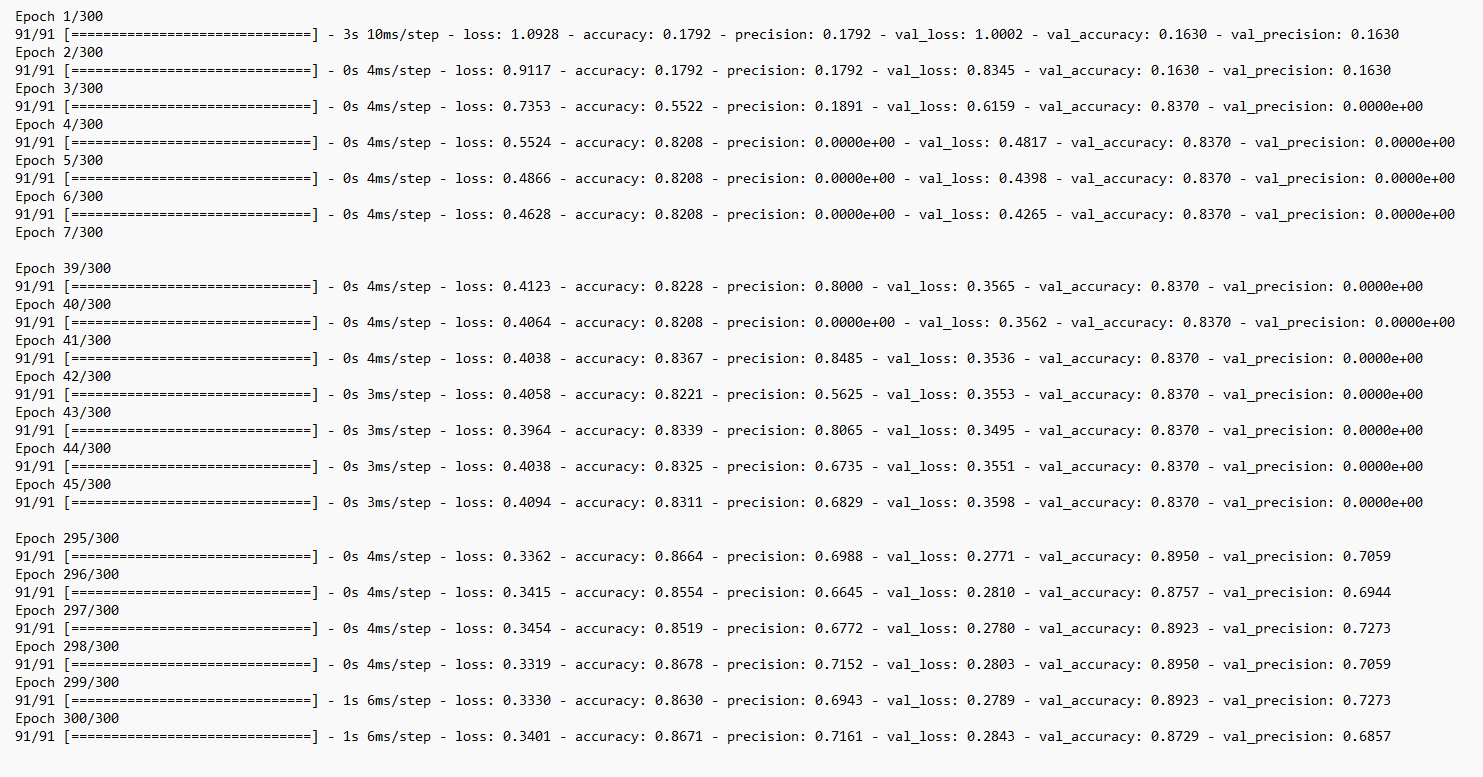

Ended up choosing conferences with ten percent or more drafted players because the other conferences subsets resulted in too few undrafted players and we ended up with the same problem. Instead of no one going to the NBA, everyone was going to the NBA.

In [24]:
#pick only conferences with a certain percentagge of drafted players
ten_p_or_gr = ['ACC', 'SEC', 'B12', 'P12', 'P10', 'WCC', 'Amer']
three_to_eight = ['B10', 'BE', 'MWC']
three_p_or_ls = ['A10', 'CUSA', 'OVC', 'Horz', 'CAA', 'WAC', 'SB', 'Pat', 'BSky', 'Sum', 'SC', 'MVC', 'MAC', 'BW', 'MEAC', 'Ivy']

# Only include rows in which a player was drafted, and before 2018 (2018+ will be used as test data)

train_data1 = all_data.loc[(all_data['Last_Yr_in_College_Date_Yr'].le(2019)) & (all_data['Last_Yr_in_College_conf'].isin(ten_p_or_gr)) & (all_data['pick'].lt(1))]
train_data2 = all_data.loc[(all_data['Last_Yr_in_College_Date_Yr'].le(2019)) & (all_data['pick'].ge(1))]

train_data = train_data1.append([train_data2])
#train_data = all_data.loc[(all_data['Last_Yr_in_College_Date_Yr'].le(2019))]

<ipython-input-24-1e52f1b05cb7>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data1.append([train_data2])


# **Taking our data and encoding it to be read by the NN**

### Old method of encoding

This method resulted in around 400 columns of data being generated, which didnt increase computational complexity so much as make the data near impossible to manage afterwards without de encoding it.

In [6]:

# Create a OneHotEncoder instance
#enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#encode_df = pd.DataFrame(enc.fit_transform(all_data[all_cat]))

# Add the encoded variable names to the dataframe
#encode_df.columns = enc.get_feature_names_out(all_cat)
#encode_df.columns.to_list()

# Merge one-hot encoded features and drop the originals
#all_data = all_data.merge(encode_df,left_index=True,right_index=True)
#all_data = all_data.drop(all_cat,axis=1)
#all_data['pick'].head()

### New method of encoding

As opposed to the old method, encoding based on label, lets all the data stay in one column exactly how we had it, and instead changes the categorical value to a numeral, making the data much easier to read and manage and verify.

In [25]:
enc = LabelEncoder()

enc_column = enc.fit_transform(train_data['Last_Yr_in_College_team'])
enc_column2 = enc.fit_transform(train_data['Last_Yr_in_College_conf'])
enc_column3 = enc.fit_transform(train_data['Last_Yr_in_College_School_Yr'])
enc_column4 = enc.fit_transform(train_data['Last_Yr_in_College_Position'])

train_data['Last_Yr_in_College_team'] = enc_column
train_data['Last_Yr_in_College_conf'] = enc_column2
train_data['Last_Yr_in_College_School_Yr'] = enc_column3
train_data['Last_Yr_in_College_Position'] = enc_column4

train_data

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,blk,pts,Drafted,Round_Drafted,Number_of_Yrs_Played,Last_Yr_in_College_Date_Yr,Last_Yr_in_College_team,Last_Yr_in_College_conf,Last_Yr_in_College_School_Yr,Last_Yr_in_College_Position
3,30.0,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,0.1333,4.9333,0.0,0.0,1,2009,84,25,3,6
11,19.0,18.4,95.1,8.2,45.2,48.39,6.9,12.9,3.8,26.3,...,0.1579,1.2632,0.0,0.0,1,2009,73,1,3,6
14,35.0,75.2,104.4,15.9,43.1,49.61,4.8,11.7,21.3,23.4,...,0.6857,7.0571,0.0,0.0,1,2009,46,22,3,6
30,32.0,59.8,113.2,18.7,52.7,55.77,1.0,8.2,25.6,21.2,...,0.0000,8.3125,0.0,0.0,1,2009,93,25,3,6
37,30.0,80.2,103.3,24.7,47.8,50.64,9.9,13.3,8.3,16.3,...,0.6667,15.1667,0.0,0.0,1,2009,0,22,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18538,32.0,76.8,106.0,25.5,49.1,54.19,4.8,12.8,14.2,14.2,...,0.8125,16.5000,1.0,1.0,1,2019,40,3,0,8
18720,37.0,76.2,112.9,21.7,52.1,55.75,5.5,16.5,10.6,14.5,...,0.1622,13.4595,1.0,1.0,1,2019,45,22,0,7
19051,37.0,81.0,118.2,20.0,53.6,58.03,1.6,14.0,15.2,14.8,...,0.3243,14.0270,1.0,1.0,1,2019,45,22,0,8
19158,32.0,50.0,133.8,16.9,72.8,73.90,8.8,16.2,2.6,13.9,...,2.2188,10.0000,1.0,1.0,1,2019,111,4,0,0


# Now that our data is encoded, we need to split and scale it.


## Split it

The lists are for picking our X and dropping the chaff.  W went with Drafted/Undrafted for our Y when they are picked doesn't really matter for our ask.  When we split, 40% test was the sweet spot, 30% took twice as long to start learning and 50% caused the model to be overfit and not learn at all.  Shuffling and Stratifying the data makes sure that we have equity in our train and test Y.

In [26]:
#The entire feature set
features_list = ['pick','Drafted','Round_Drafted','rimmade','rimmade+rimmiss',
            'midmade','midmade+midmiss','rimmade/(rimmade+rimmiss)',
            'midmade/(midmade+midmiss)','dunksmade','dunksmiss+dunksmade',
            'dunksmade/(dunksmade+dunksmiss)','Last_Yr_in_College_Position', 
            'Last_Yr_in_College_School_Yr','Number_of_Yrs_Played', 
            'Last_Yr_in_College_Date_Yr','GP','Min_per','Ortg','usg','eFG',
            'TS_per', 'ORB_per','DRB_per','AST_per','TO_per','FTM','FTA',
            'FT_per','twoPM','twoPA','twoP_per','TPM','TPA','TP_per','blk_per',
            'stl_per','ftr', 'ht','porpag','adjoe','pfr','drtg','adrtg',
            'dporpag','stops','bpm','obpm','dbpm','gbpm','mp','ogbpm','dgbpm',
            'oreb', 'dreb','treb','ast','stl','blk','pts',
             'Last_Yr_in_College_team','Last_Yr_in_College_conf'
]


##
## I have been cut and pasting between drop_list and Keep to keep this readable.
##
#list of features that were introducing noise to the data. making it difficult for the model to learn.
drop_list = [ 'pick','Drafted','Round_Drafted','rimmade','rimmade+rimmiss',
            'midmade','midmade+midmiss','rimmade/(rimmade+rimmiss)',
            'midmade/(midmade+midmiss)','dunksmade','dunksmiss+dunksmade',
            'dunksmade/(dunksmade+dunksmiss)','Last_Yr_in_College_Position', 
            'Last_Yr_in_College_School_Yr','Number_of_Yrs_Played', 
            'Last_Yr_in_College_Date_Yr','ftr','eFG','stl_per','blk_per',
             'Min_per','Ortg','TS_per', 'ORB_per','DRB_per', 'adjoe','pfr',
             'AST_per','porpag','dporpag','drtg', 'adrtg','FTM','FTA','twoPM',
             'twoPA','TPM','TPA','bpm','obpm', 'dbpm','gbpm','ogbpm','dgbpm',
             'oreb', 'dreb',  
             ]

#list of features that stay in the model.  Each item should be present when
#running train_data.drop(drop_list,1).columns
Keep = ['pts','stl','blk','TO_per', 'FT_per', 'twoP_per', 'TP_per',
        'Last_Yr_in_College_conf','GP', 'usg', 'mp','stops','ht', 'ast', 
        'Last_Yr_in_College_team','treb'
]


# Creates a target object for the pick and calls it y. We can choose between 
# Drafted. pick or Round_Drafted for our predictions by commenting and 
# uncommenting. Pick and Round_Drafted will require a different set of 
# hyperparameters in the model since we move from binary to multi catergorical
# classification.

Y = train_data.Drafted
#Y = train_data.pick
#Y = train_data.Round_Drafted

#Sets the feature choices made above.
X = train_data.drop(drop_list,1).values

# Split into validation and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, shuffle=True, stratify=Y)

train_data.drop(drop_list,1).columns

<ipython-input-26-9e9ae5720c6e>:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train_data.drop(drop_list,1).values
<ipython-input-26-9e9ae5720c6e>:57: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_data.drop(drop_list,1).columns


Index(['GP', 'usg', 'TO_per', 'FT_per', 'twoP_per', 'TP_per', 'ht', 'stops',
       'mp', 'treb', 'ast', 'stl', 'blk', 'pts', 'Last_Yr_in_College_team',
       'Last_Yr_in_College_conf'],
      dtype='object')


## Scale it

In [27]:
# Create a StandardScaler instances
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train.shape

(1807, 16)

# Using TF.Keras

## Building and compiling the model.

After finding this configuration, I began testing different iterations one variable at a time. What was found is that the first iteration was the optimal one, changing one thing in either direction would result in either a slower training model, or the whole model would revert to not learning even after 1000 epochs. The initial layer has seen success with 15 nodes, the kernal initializer was set to reduce the weights before starting to lower than default to reduce overfitting.  The same reason we add dropout layers and a kernal regularizer, all to keep the model complex enough to work, but not learn so quickly it just memorizes the data.

The adam optimizer was chosen due it's performance on the loss metric vs other optimizers. The learning rate was set low to help keep the model from converging too quickly and reverting back to not learning anything. Precision was added as a metric due to accuracy being unreliable on it's own with this model.  Precision added a much needed visibility into the percentage of correct guesses of Drafted players, wheras with the high number of nagatives in the dataset already, the model was achieving 80% accuracy on true/false negatives which left us blind to how the model was performing during training.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import L1L2

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # gets the number of columns in the first row of data
hidden_nodes_layer1 =  15
#hidden_nodes_layer2 = 10
#hidden_nodes_layer3 = 10

nn = Sequential([
  # Input layer
  Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu", kernel_initializer='he_normal'),
  # Dropout layer with a dropout rate of 0.5
  Dropout(0.7),
  # Hidden layer
  Dense(3, activation='relu', kernel_regularizer=L1L2(l1=0.01, l2=0.0001)),
  # Another dropout layer with a dropout rate of 0.5
  Dropout(0.3),
  # Hidden layer
  Dense(2, activation='relu'),
  # Hidden layer
  Dense(3, activation='relu'),
  # Hidden layer
  Dense(6, activation='relu'),
  # Output layer
  Dense(units=1, activation="softplus")
])



# Check the structure of the model
nn.summary()

# Compile the model
adam = Adam(lr=0.01)
nn.compile(optimizer=adam, loss="binary_crossentropy", metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision')])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 15)                255       
                                                                 
 dropout_6 (Dropout)         (None, 15)                0         
                                                                 
 dense_19 (Dense)            (None, 3)                 48        
                                                                 
 dropout_7 (Dropout)         (None, 3)                 0         
                                                                 
 dense_20 (Dense)            (None, 2)                 8         
                                                                 
 dense_21 (Dense)            (None, 3)                 9         
                                                                 
 dense_22 (Dense)            (None, 6)                

## Train the model

In [32]:
# Train the model
fit_model = nn.fit(X_train_scaled,Y_train, batch_size=16, epochs=1000, validation_data=(X_test_scaled, Y_test))

Epoch 1/1000
113/113 [==============================] - 2s 7ms/step - loss: 2.3220 - accuracy: 0.1760 - precision: 0.1760 - val_loss: 1.0360 - val_accuracy: 0.1758 - val_precision: 0.1758
Epoch 2/1000
113/113 [==============================] - 0s 4ms/step - loss: 1.0362 - accuracy: 0.1760 - precision: 0.1760 - val_loss: 0.8347 - val_accuracy: 0.1758 - val_precision: 0.1758
Epoch 3/1000
113/113 [==============================] - 0s 4ms/step - loss: 0.7617 - accuracy: 0.5695 - precision: 0.1958 - val_loss: 0.6813 - val_accuracy: 0.8242 - val_precision: 0.0000e+00
Epoch 4/1000
113/113 [==============================] - 1s 4ms/step - loss: 0.6218 - accuracy: 0.8240 - precision: 0.0000e+00 - val_loss: 0.5783 - val_accuracy: 0.8242 - val_precision: 0.0000e+00
Epoch 5/1000
113/113 [==============================] - 1s 5ms/step - loss: 0.5468 - accuracy: 0.8240 - precision: 0.0000e+00 - val_loss: 0.5267 - val_accuracy: 0.8242 - val_precision: 0.0000e+00
Epoch 6/1000
113/113 [==================

## Print the results.

In [33]:
# Evaluate the model using the test data
evaluation_results = nn.evaluate(X_test_scaled, Y_test, verbose=2)

model_loss = evaluation_results[0]
model_accuracy = evaluation_results[1]
model_precision = evaluation_results[2]

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, Precision: {model_precision}")

38/38 - 0s - loss: 0.2720 - accuracy: 0.8814 - precision: 0.7949 - 80ms/epoch - 2ms/step
Loss: 0.2720300853252411, Accuracy: 0.881426215171814, Precision: 0.7948718070983887


In [34]:
# Import dependencies
import os
import shutil

# Define the checkpoint path and filenames
#shutil.rmtree("checkpoints/", ignore_errors=True)
#os.rmdir("checkpoints/",ignore_errors=True)
os.makedirs("model/",exist_ok=True)
save_path = "model/pick_the_pick.h5"

# Save the model
nn.save(save_path)

# Pick the Pick 2020-2021

Now that we have a trained model, we can import and run completely new data against it to see what predictions it gives us.

First we need to load the data.

In [99]:
from tensorflow.keras.models import load_model
nn = load_model('model/pick_the_pick.h5')

# Path of file to read
data_path = 'CleanData/Players_Avg_Stats_09_21_clean.csv'
data = pd.read_csv(data_path, low_memory = False)
data

,pid,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,...,pts,Drafted,Round_Drafted,Number_of_Yrs_Played,Last_Yr_in_College_Date_Yr,player_name,Last_Yr_in_College_team,Last_Yr_in_College_conf,Last_Yr_in_College_School_Yr,Last_Yr_in_College_Position
0,2,26.0,29.500000,97.3,16.600000,42.500000,44.430000,1.6,4.6,15.8,...,3.884600,0.0,0.0,1,2009,DEANDRAE ROSS,South Alabama,SB,So,Unknown
1,3,33.0,63.133333,107.4,17.233333,51.166667,53.403333,2.3,6.2,14.8,...,7.796367,0.0,0.0,3,2011,POOH WILLIAMS,Utah St.,WAC,Sr,Combo G
2,5,27.0,72.000000,96.2,21.800000,45.700000,47.980000,2.1,8.0,14.7,...,12.185200,0.0,0.0,1,2009,JESUS VERDEJO,South Florida,BE,Sr,Unknown
3,8,30.0,44.500000,97.7,16.000000,53.600000,53.690000,4.1,9.4,13.7,...,4.933300,0.0,0.0,1,2009,MIKE HORNBUCKLE,Pepperdine,WCC,Sr,Unknown
4,9,33.0,56.200000,96.5,22.000000,52.800000,54.310000,8.3,18.6,8.2,...,7.575800,0.0,0.0,1,2009,ANTHONY BROWN,Pacific,BW,Sr,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22364,74196,8.0,3.700000,92.7,13.400000,40.000000,45.660000,7.4,21.4,17.4,...,0.625000,0.0,0.0,1,2021,ISAIAH FOLKES,Charlotte,CUSA,Fr,Wing G
22365,74203,16.0,12.900000,129.5,13.200000,67.900000,65.840000,8.5,8.5,2.4,...,2.812500,0.0,0.0,1,2021,FRANCK KEPNANG,Oregon,P12,Fr,C
22366,74213,10.0,5.900000,47.2,28.600000,11.900000,17.110000,0.0,24.9,13.8,...,1.727300,0.0,0.0,1,2021,GERALD DOAKES,New Mexico St.,WAC,Fr,Wing G
22367,74217,9.0,17.100000,86.9,21.800000,39.100000,40.090000,7.3,12.3,6.5,...,5.111100,0.0,0.0,1,2021,DAVID JONES,DePaul,BE,Fr,Wing F


Next we will pull out the new data.  We tested using 2019 and older data, so here we will grab 2020 and newer data to test against.  We'll reindex it so the datas index will match the predicion results the model gives us.

In [170]:
# Generate some test data
# Only include rows in which a player was drafted, and before 2018 (2018+ will be used as test data)
test_data = data[data['Last_Yr_in_College_Date_Yr'].ge(2020)].reset_index()
test_data

,index,pid,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,pts,Drafted,Round_Drafted,Number_of_Yrs_Played,Last_Yr_in_College_Date_Yr,player_name,Last_Yr_in_College_team,Last_Yr_in_College_conf,Last_Yr_in_College_School_Yr,Last_Yr_in_College_Position
0,9310,27085,27.250000,54.175000,96.675,20.475000,52.775,55.425000,5.575000,15.575000,...,6.961275,0.0,0.0,4,2020,JOSH WARREN,Cornell,Ivy,Sr,Stretch 4
1,11176,32932,24.750000,32.975000,98.850,16.975000,57.575,56.692500,7.775000,16.325000,...,5.366325,0.0,0.0,4,2020,ANDRE ADAMS,Southern Utah,BSky,Jr,C
2,11401,33635,24.250000,30.425000,106.975,18.800000,51.400,54.967500,13.550000,22.325000,...,5.452125,0.0,0.0,4,2020,DAVID BELL,Jacksonville,ASun,Sr,C
3,11538,33955,25.600000,51.200000,114.740,17.260000,57.640,60.532000,2.660000,13.480000,...,9.574800,0.0,0.0,5,2020,JAKE TOOLSON,BYU,WCC,Sr,Combo G
4,11961,35307,29.333333,41.233333,116.300,17.666667,57.500,58.853333,9.733333,17.033333,...,6.976567,0.0,0.0,3,2020,EMMITT HOLT,Providence,BE,Sr,Stretch 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5686,22364,74196,8.000000,3.700000,92.700,13.400000,40.000,45.660000,7.400000,21.400000,...,0.625000,0.0,0.0,1,2021,ISAIAH FOLKES,Charlotte,CUSA,Fr,Wing G
5687,22365,74203,16.000000,12.900000,129.500,13.200000,67.900,65.840000,8.500000,8.500000,...,2.812500,0.0,0.0,1,2021,FRANCK KEPNANG,Oregon,P12,Fr,C
5688,22366,74213,10.000000,5.900000,47.200,28.600000,11.900,17.110000,0.000000,24.900000,...,1.727300,0.0,0.0,1,2021,GERALD DOAKES,New Mexico St.,WAC,Fr,Wing G
5689,22367,74217,9.000000,17.100000,86.900,21.800000,39.100,40.090000,7.300000,12.300000,...,5.111100,0.0,0.0,1,2021,DAVID JONES,DePaul,BE,Fr,Wing F


# Preprocessing

We need to preprocess the data the same as when we build the training data.  The model will be useless if we give it data in a format it isn't expecting.

## Remove identifiers

Here we remove the index pid and player_name and save them in a dataframe.  Since we reset the index, this will allow us to readd the identifiers after the data is processed by the model. Then we drop the identifiers from the table.

In [171]:
test_data_identifiers =  test_data[['index', 'pid', 'player_name']].copy()
test_data_identifiers

,index,pid,player_name
0,9310,27085,JOSH WARREN
1,11176,32932,ANDRE ADAMS
2,11401,33635,DAVID BELL
3,11538,33955,JAKE TOOLSON
4,11961,35307,EMMITT HOLT
...,...,...,...
5686,22364,74196,ISAIAH FOLKES
5687,22365,74203,FRANCK KEPNANG
5688,22366,74213,GERALD DOAKES
5689,22367,74217,DAVID JONES


In [172]:
test_data = test_data.drop(['index', 'pid', 'player_name'], axis=1)

## Encode the data.

In [173]:
enc = LabelEncoder()

enc_column = enc.fit_transform(test_data['Last_Yr_in_College_team'])
enc_column2 = enc.fit_transform(test_data['Last_Yr_in_College_conf'])
enc_column3 = enc.fit_transform(test_data['Last_Yr_in_College_School_Yr'])
enc_column4 = enc.fit_transform(test_data['Last_Yr_in_College_Position'])

test_data['Last_Yr_in_College_team'] = enc_column
test_data['Last_Yr_in_College_conf'] = enc_column2
test_data['Last_Yr_in_College_School_Yr'] = enc_column3
test_data['Last_Yr_in_College_Position'] = enc_column4

test_data

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,blk,pts,Drafted,Round_Drafted,Number_of_Yrs_Played,Last_Yr_in_College_Date_Yr,Last_Yr_in_College_team,Last_Yr_in_College_conf,Last_Yr_in_College_School_Yr,Last_Yr_in_College_Position
0,27.250000,54.175000,96.675,20.475000,52.775,55.425000,5.575000,15.575000,19.850,25.475,...,0.532025,6.961275,0.0,0.0,4,2020,61,14,3,5
1,24.750000,32.975000,98.850,16.975000,57.575,56.692500,7.775000,16.325000,10.050,26.050,...,0.562750,5.366325,0.0,0.0,4,2020,276,8,1,0
2,24.250000,30.425000,106.975,18.800000,51.400,54.967500,13.550000,22.325000,4.475,17.375,...,0.986325,5.452125,0.0,0.0,4,2020,131,3,3,0
3,25.600000,51.200000,114.740,17.260000,57.640,60.532000,2.660000,13.480000,14.540,17.660,...,0.169720,9.574800,0.0,0.0,5,2020,18,31,3,1
4,29.333333,41.233333,116.300,17.666667,57.500,58.853333,9.733333,17.033333,6.400,13.300,...,0.600533,6.976567,0.0,0.0,3,2020,237,7,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5686,8.000000,3.700000,92.700,13.400000,40.000,45.660000,7.400000,21.400000,17.400,25.800,...,0.000000,0.625000,0.0,0.0,1,2021,47,12,0,8
5687,16.000000,12.900000,129.500,13.200000,67.900,65.840000,8.500000,8.500000,2.400,9.200,...,1.125000,2.812500,0.0,0.0,1,2021,225,22,0,0
5688,10.000000,5.900000,47.200,28.600000,11.900,17.110000,0.000000,24.900000,13.800,10.700,...,0.000000,1.727300,0.0,0.0,1,2021,195,30,0,8
5689,9.000000,17.100000,86.900,21.800000,39.100,40.090000,7.300000,12.300000,6.500,11.800,...,0.222200,5.111100,0.0,0.0,1,2021,66,7,0,7


## Drop the noisy features

In [188]:
# Creates a target object for the pick and calls it y
X_test_df = test_data.drop(drop_list,1)
X_test = test_data.drop(drop_list,1).values
X_test_df

<ipython-input-188-5591be1572dd>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test_df = test_data.drop(drop_list,1)
<ipython-input-188-5591be1572dd>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = test_data.drop(drop_list,1).values


,GP,usg,TO_per,FT_per,twoP_per,TP_per,ht,stops,mp,treb,ast,stl,blk,pts,Last_Yr_in_College_team,Last_Yr_in_College_conf
0,27.250000,20.475000,25.475,0.706000,0.542000,0.233750,80.0,104.032100,21.71440,3.937675,2.188675,0.383275,0.532025,6.961275,61,14
1,24.750000,16.975000,26.050,0.532500,0.589750,0.080250,78.0,87.681825,15.74105,3.696875,0.771075,0.481200,0.562750,5.366325,276,8
2,24.250000,18.800000,17.375,0.619750,0.515000,0.000000,76.5,86.931300,13.53370,4.743525,0.372075,0.218100,0.986325,5.452125,131,3
3,25.600000,17.260000,17.660,0.900000,0.590400,0.403600,77.0,113.690020,22.93554,3.343860,2.081420,0.560720,0.169720,9.574800,18,31
4,29.333333,17.666667,13.300,0.649333,0.571333,0.239667,79.0,102.540467,18.05880,4.014733,0.600667,0.420733,0.600533,6.976567,237,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5686,8.000000,13.400000,25.800,1.000000,0.400000,0.000000,76.0,5.518670,4.50000,1.000000,0.375000,0.000000,0.000000,0.625000,47,12
5687,16.000000,13.200000,9.200,0.538000,0.679000,0.000000,83.0,28.365800,9.06250,1.250000,0.125000,0.125000,1.125000,2.812500,225,22
5688,10.000000,28.600000,10.700,0.600000,0.091000,0.100000,74.0,6.806470,4.90910,1.000000,0.363600,0.181800,0.000000,1.727300,195,30
5689,9.000000,21.800000,11.800,0.600000,0.488000,0.071000,78.0,24.179000,14.66670,2.666700,0.444400,0.444400,0.222200,5.111100,66,7


## Scale it

In [175]:
# Create a StandardScaler instances
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit the StandardScaler
X_scaler = scaler.fit(X_test)

# Scale the data
X_test_scaled = X_scaler.transform(X_test)

# Prediction Time
Our first cell runs the data through the model.

Then we set a threshold to round up from and convert the predictions into a 1 or a 0.  We convert the predictions to a data frame 

In [176]:
predictions = nn.predict(X_test_scaled)

178/178 [==============================] - 0s 2ms/step


In [177]:
pick_count = data[data['Last_Yr_in_College_Date_Yr'].ge(2020)][data['pick'] > 0].count()
pick_count

<ipython-input-177-686a70865e08>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pick_count = data[data['Last_Yr_in_College_Date_Yr'].ge(2020)][data['pick'] > 0].count()


pid                             97
GP                              97
Min_per                         97
Ortg                            97
usg                             97
                                ..
player_name                     97
Last_Yr_in_College_team         97
Last_Yr_in_College_conf         97
Last_Yr_in_College_School_Yr    97
Last_Yr_in_College_Position     97
Length: 64, dtype: int64

In [221]:
# Set a threshold value (e.g., 0.5 for binary classification)
threshold = 0.02
# Apply the thresholding function to the predictions
rounded_predictions = (predictions >= threshold)
#Merge prediction to test data
pred_df = pd.DataFrame(rounded_predictions, columns=['Prediction'])
#pre_results = pd.concat([test_data, pred_df], axis=1)


In [223]:
pred_df.value_counts()

Prediction
False         5669
True            22
dtype: int64

## Add the predictions and Identifiers back to the data.

In [224]:
results = pd.concat([test_data_identifiers, pred_df, test_data], axis=1)
results

,index,pid,player_name,Prediction,GP,Min_per,Ortg,usg,eFG,TS_per,...,blk,pts,Drafted,Round_Drafted,Number_of_Yrs_Played,Last_Yr_in_College_Date_Yr,Last_Yr_in_College_team,Last_Yr_in_College_conf,Last_Yr_in_College_School_Yr,Last_Yr_in_College_Position
0,9310,27085,JOSH WARREN,False,27.250000,54.175000,96.675,20.475000,52.775,55.425000,...,0.532025,6.961275,0.0,0.0,4,2020,61,14,3,5
1,11176,32932,ANDRE ADAMS,False,24.750000,32.975000,98.850,16.975000,57.575,56.692500,...,0.562750,5.366325,0.0,0.0,4,2020,276,8,1,0
2,11401,33635,DAVID BELL,False,24.250000,30.425000,106.975,18.800000,51.400,54.967500,...,0.986325,5.452125,0.0,0.0,4,2020,131,3,3,0
3,11538,33955,JAKE TOOLSON,False,25.600000,51.200000,114.740,17.260000,57.640,60.532000,...,0.169720,9.574800,0.0,0.0,5,2020,18,31,3,1
4,11961,35307,EMMITT HOLT,False,29.333333,41.233333,116.300,17.666667,57.500,58.853333,...,0.600533,6.976567,0.0,0.0,3,2020,237,7,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5686,22364,74196,ISAIAH FOLKES,False,8.000000,3.700000,92.700,13.400000,40.000,45.660000,...,0.000000,0.625000,0.0,0.0,1,2021,47,12,0,8
5687,22365,74203,FRANCK KEPNANG,False,16.000000,12.900000,129.500,13.200000,67.900,65.840000,...,1.125000,2.812500,0.0,0.0,1,2021,225,22,0,0
5688,22366,74213,GERALD DOAKES,False,10.000000,5.900000,47.200,28.600000,11.900,17.110000,...,0.000000,1.727300,0.0,0.0,1,2021,195,30,0,8
5689,22367,74217,DAVID JONES,False,9.000000,17.100000,86.900,21.800000,39.100,40.090000,...,0.222200,5.111100,0.0,0.0,1,2021,66,7,0,7


In [226]:
predictions_vs_True = results[['Drafted', 'Prediction', 'player_name']].copy()
predictions_vs_True

,Drafted,Prediction,player_name
0,0.0,False,JOSH WARREN
1,0.0,False,ANDRE ADAMS
2,0.0,False,DAVID BELL
3,0.0,False,JAKE TOOLSON
4,0.0,False,EMMITT HOLT
...,...,...,...
5686,0.0,False,ISAIAH FOLKES
5687,0.0,False,FRANCK KEPNANG
5688,0.0,False,GERALD DOAKES
5689,0.0,False,DAVID JONES


# Using NEAT
### This model seems to have the same overfitting issue being addressed above.

In [ ]:
!pip install neat-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 4.3 MB/s eta 0:00:00


In [ ]:
import neat
import numpy as np
import os
config_path = os.path.join('lib', 'config_neat.txt')

def eval_genomes(genomes, config):
      for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        num_correct_predictions = 0
        num_examples = 0

        for xi, xo in zip(X_train, Y_train):
            output = net.activate(xi)
            predicted_label = np.argmax(output)
            true_label = np.argmax(xo)

            if predicted_label == true_label:
                num_correct_predictions += 1

            num_examples += 1

        genome.fitness = num_correct_predictions / num_examples

def run_neat():
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path)

    population = neat.Population(config)
    stats = neat.StatisticsReporter()
    population.add_reporter(stats)
    population.add_reporter(neat.StdOutReporter(True))

    winner = population.run(eval_genomes, 50)

    return winner

if __name__ == "__main__":
    winner_genome = run_neat()

    # Load the winner genome and visualize or use it
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path)

    winner_net = neat.nn.FeedForwardNetwork.create(winner_genome, config)

    # Test the winner network on validation or test dataset
    for xi, xo in zip(X_test, Y_test):
        output = winner_net.activate(xi)
        # Evaluate the output and compare it to the expected output (xo)


 ****** Running generation 0 ****** 

Population's average fitness: 1.00000 stdev: 0.00000
Best fitness: 1.00000 - size: (1, 17) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 3.112, standard deviation 1.235
Population of 50 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    28      1.0    0.000     0
     2    0    10      1.0    0.000     0
     3    0     9      1.0    0.000     0
     4    0     3       --       --     0
Total extinctions: 0
Generation time: 1.360 sec

 ****** Running generation 1 ****** 

Population's average fitness: 1.00000 stdev: 0.00000
Best fitness: 1.00000 - size: (1, 17) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 3.124, standard deviation 1.179
Population of 51 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    28      1.0    0.000     1
     2    1     9      1.0

KeyboardInterrupt: ignored